In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

### 1. Import the CSV data as a DataFrame

In [4]:
df = pd.read_csv('student_exam_data_new.csv')

### 2. Show top 5 records

In [5]:
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [6]:
df.keys()

Index(['Study Hours', 'Previous Exam Score', 'Pass/Fail'], dtype='object')

### Prepare data input and outcome

In [7]:
X = df.iloc[0:,:-1]
y = df.iloc[0:,-1]

### Inspect input - X variable

In [8]:
X.describe()

,Study Hours,Previous Exam Score
count,500.000000,500.000000
mean,5.487055,68.917084
std,2.688196,17.129607
min,1.045554,40.277921
25%,3.171517,53.745955
50%,5.618474,68.309294
75%,7.805124,83.580209
max,9.936683,99.983060


### Inspect the relationship between input values

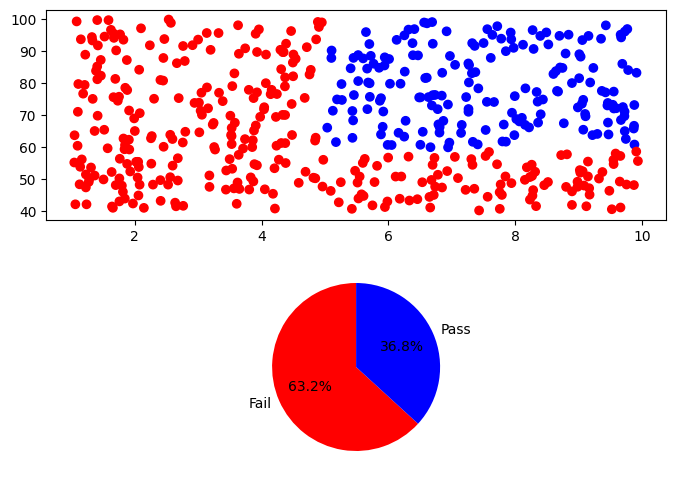

In [9]:
fig,ax = plt.subplots(2,1,figsize=(8,6))
colors = ["blue" if label == 1 else "red" for label in y]

ax[0].scatter(X.iloc[:,0],X.iloc[:,1], color=colors)
ax[1].pie(
    y.value_counts().sort_index(),  # Ensure order: 0 -> 1
    labels=["Fail", "Pass"],
    autopct="%1.1f%%",     # Optional: show percentage
    startangle=90,         # Optional: rotate for aesthetics
    colors=["red", "blue"] # Optional: match your scatter colors
)
plt.show()

### Prepare data and Split dataset into train and test data

In [12]:
# Prepare data
X = df.iloc[0:,:-1].to_numpy()
y = df.iloc[0:,-1].to_numpy()

In [13]:
X.shape

(500, 2)

In [15]:
# Split the dataset into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [16]:
y_train.shape

(400,)

### Logistic Regression

In [10]:
# each inner array (datapoint) represents one student.
# datapoint[0] = Study Hours
# datapoint[1] = Previous Exam score
# datapoint[2] = whether student passed. 1 = yes. 0 = no.

import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting


class LogisticRegression:
  def __init__(self,learning_rate,epochs):
    # self.dataset = dataset
    self.alpha =learning_rate
    self.epoch = epochs
    self.theta = None
    self.bias = None

  # use sigmoid function on one datapoint to predict, the outcome value is between 0 and 1
  def predict(self,X):
    z = np.dot(X,self.theta)+ self.bias
    probability = 1/(1+np.exp(-1 * z))
    return probability

  # optimizes theta
  def calculate_gradient(self,yi,h_xi, xi):
    d_theta = np.dot(xi.T, (yi-h_xi)) / len(yi)
    d_bias = np.sum(yi-h_xi)/len(yi)
    return d_theta,d_bias

  def update_theta(self,d_theta,d_bias):
    self.theta = self.theta + self.alpha * d_theta
    self.bias = self.bias + self.alpha * d_bias

  # calculates one datapoint
  def calculate_log_likelihood_estimation(self,X,y):
    epsilon = 1e-15
    predicted = np.clip(self.predict(X), epsilon,1-epsilon)
    actual = y
    log_likelihood = np.sum(actual * np.log(predicted)+(1-actual)*np.log(1-predicted))
    return log_likelihood

  def fit(self,X_train,y_train):
    # Initialize theta and bias value with 0
    n_samples = len(X_train)
    n_features = len(X_train[0])
    self.theta = np.zeros(n_features)
    self.bias = 0

    # Training
    for _ in range(self.epoch):
      predicted = self.predict(X_train)
      actual = y_train
      current_probability = self.calculate_log_likelihood_estimation(X_train,y_train)
      d_theta,d_bias = self.calculate_gradient(actual,predicted,X_train)
      self.update_theta(d_theta,d_bias)

  def plot_datapoint(self,X,y):
    plt.figure(figsize=(8,6))
    colors = ["blue" if label == 1 else "red" for label in y]
    plt.scatter(X[:,0],X[:,1],color=colors)
    plt.xlabel('Study Hours')
    plt.ylabel('Previous Exam Score')
    plt.title('Student Exam Data')
    plt.show()


### Train model

In [17]:
# Train the model
model = LogisticRegression(learning_rate=0.001,epochs=500)
model.fit(X_train,y_train)
# model.plot_logistic_regression_line(X_train,y_train)

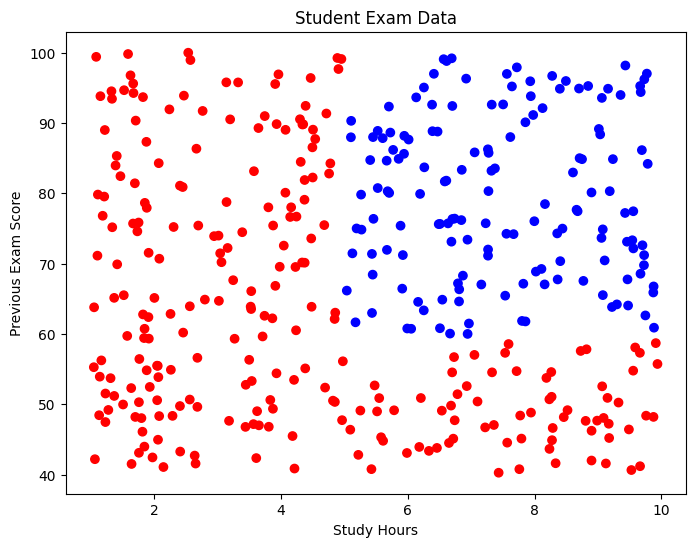

In [18]:
model.plot_datapoint(X_train,y_train)

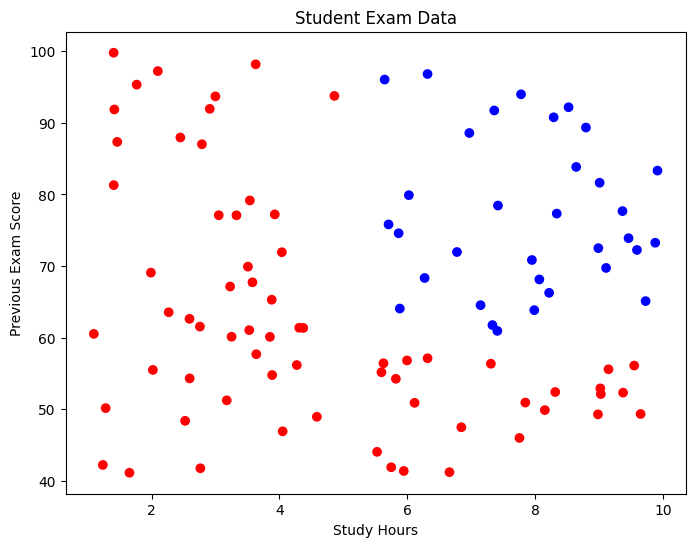

In [19]:
model.plot_datapoint(X_test,y_test)

In [20]:
prob = model.predict(X_test[0])
# print(f"Study Hours = {X_test[0][0]} , Previous Exam Score = {X_test[0][1]} -> {'Pass' if prob > 0.5 else 'Fail'}")
pass_study_hours_avg = np.mean(X_train[y_train == 1][:,0])
fail_study_hours_avg = np.mean(X_train[y_train == 0][:,0])
pass_exam_score_avg = np.mean(X_train[y_train==1][:,1])
fail_exam_score_avg = np.mean(X_train[y_train==0][:,1])
# for i in X_test:
#   prob = model.predict(i)
#   print(f"Study Hours = {i[0]} , Previous Exam Score = {i[1]} -> {'Pass' if prob > 0.5 else 'Fail'}")
print(f"Pass Study Hours Average = {pass_study_hours_avg} , Fail Study Hours Average = {fail_study_hours_avg}")
print(f"Pass Exam Score Average = {pass_exam_score_avg} , Fail Exam Score Average = {fail_exam_score_avg}")


Pass Study Hours Average = 7.468067435723393 , Fail Study Hours Average = 4.243787556737377
Pass Exam Score Average = 79.28617158082616 , Fail Exam Score Average = 63.25009620088614
